## Visualization of Tuitions of Colleges and States in the USA

In [2]:
library(tidyverse)
library(rvest)
library(magrittr)
library(stringr)

In [3]:
#load file with tuition data
state_colleges <- read_csv("tabn330.20.csv")

Warning message:
"Missing column names filled in: 'X8' [8]"Parsed with column specification:
cols(
  `<U+FEFF>States` = col_character(),
  `Total_2013-2014` = col_character(),
  `IN_TF_2013-14` = col_character(),
  `Total_2014-15` = col_character(),
  `IN_TF_2014-15` = col_character(),
  Room = col_character(),
  Board = col_character(),
  X8 = col_character(),
  Total_OS_13 = col_character(),
  `OS_TF_2013-14` = col_character(),
  `Total_OS_2014-15` = col_character(),
  `OS_TF_2014-2-15` = col_character(),
  Room_OS = col_character(),
  Board_OS = col_character(),
  `In-state, 2013-14(2y)` = col_character(),
  `In-state, 2014-15(2y)` = col_character(),
  `OS-state, 2014-15(2y)` = col_character()
)


In [4]:
head(state_colleges)

﻿States,Total_2013-2014,IN_TF_2013-14,Total_2014-15,IN_TF_2014-15,Room,Board,X8,Total_OS_13,OS_TF_2013-14,Total_OS_2014-15,OS_TF_2014-2-15,Room_OS,Board_OS,"In-state, 2013-14(2y)","In-state, 2014-15(2y)","OS-state, 2014-15(2y)"
United States,"$18,100","$8,312","$18,632","$8,543","$5,677","$4,412","$23,523","$36,587","$25,696","$37,990","$26,740","$6,229","$5,021","$2,882","$2,955","$7,122"
Alaska,"15,693","6,141","16,814","6,356","6,298","4,160","19,185","30,261","20,943","25,961","19,136","3,881","2,944","4,652","3,340","3,340"
Arizona,"19,781","9,906","19,839","9,775","6,422","3,641","23,180","20,195","11,462","20,928","12,201","4,549","4,178","1,949","2,025","8,086"
Arkansas,"14,651","6,894","15,320","7,261","4,534","3,526","17,219","26,475","19,104","27,486","19,974","3,918","3,594","2,812","2,973","4,781"
California,"21,280","8,903","21,749","9,008","7,110","5,630","30,175","41,889","29,678","38,468","27,388","6,179","4,902","1,233","1,244","6,731"
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
names(state_colleges) <- c("States","Total_2013_14","IN_TF_2013_14", "Total_2014_15","IN_TF_2014_15","Room","Board",
                           "OS_TF_2014-15","Total_OS_13","OS_TF_2013_14","Total_OS_2014_15","OS_TF_2014_15","Room_OS","Board_OS",
                           "In-state_2013-14(2y)","In-state, 2014-15(2y)","OS-state_2014-15(2y)")

In [6]:
state_colleges <- na.omit(state_colleges)

In [7]:
state <- c("United States",state.abb)
state_colleges$States <- state
state_colleges$States

[1] "United States" "AL"            "AK"            "AZ"           
 [5] "AR"            "CA"            "CO"            "CT"           
 [9] "DE"            "FL"            "GA"            "HI"           
[13] "ID"            "IL"            "IN"            "IA"           
[17] "KS"            "KY"            "LA"            "ME"           
[21] "MD"            "MA"            "MI"            "MN"           
[25] "MS"            "MO"            "MT"            "NE"           
[29] "NV"            "NH"            "NJ"            "NM"           
[33] "NY"            "NC"            "ND"            "OH"           
[37] "OK"            "OR"            "PA"            "RI"           
[41] "SC"            "SD"            "TN"            "TX"           
[45] "UT"            "VT"            "VA"            "WA"           
[49] "WV"            "WI"            "WY"

In [9]:
write.csv(state_colleges,"tabn330.20.csv")

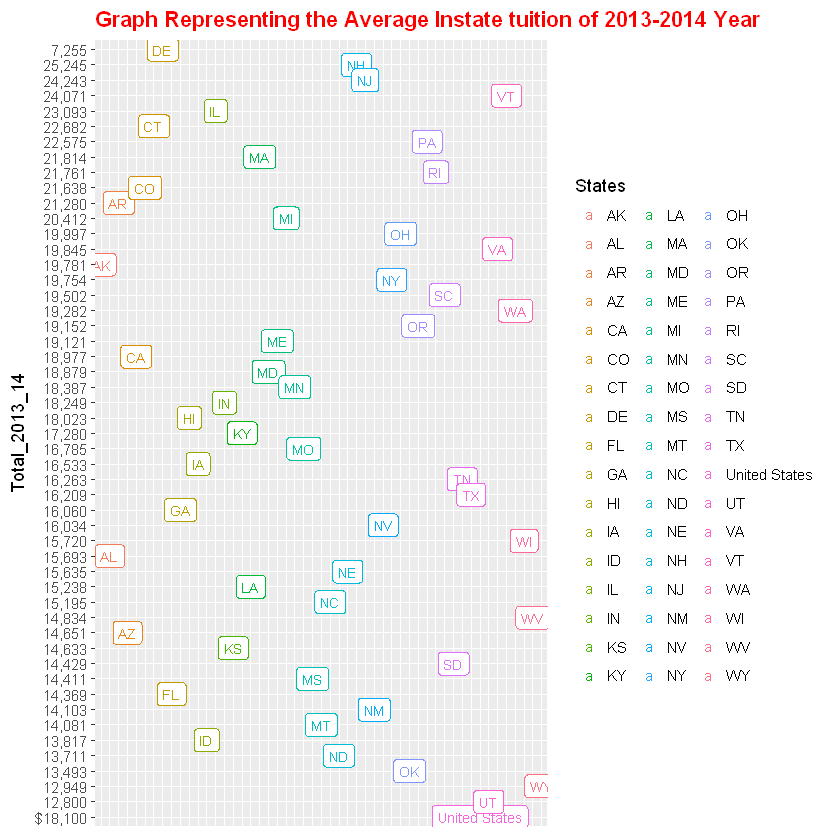

In [42]:
state_colleges %>%
    group_by(Total_2013_14) %>%
    ggplot() +
        geom_label(mapping = aes(x = States, y = Total_2013_14, color=States, label = States), size = 3.0) +
        ggtitle(label = "Graph Representing the Average Instate Total Cost of 2013-2014 Year") +
        theme(plot.title = element_text(face = "bold",colour = "red"),
              axis.title.x=element_blank(),
              axis.text.x=element_blank(),
              axis.ticks.x=element_blank())

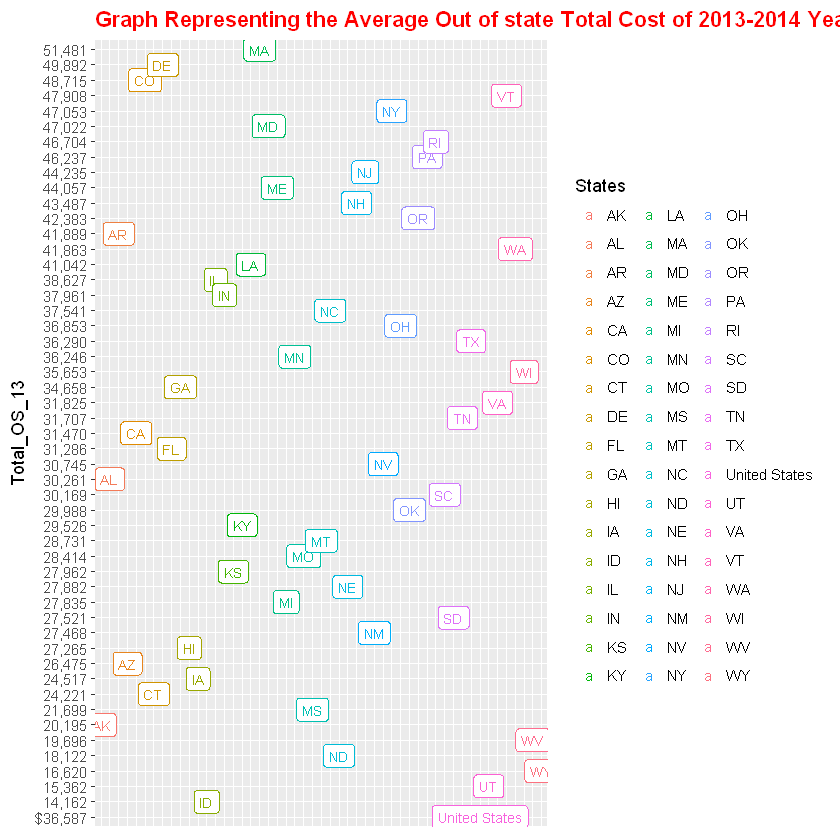

In [46]:
state_colleges %>%
    group_by(Total_OS_13) %>%
    ggplot() +
        geom_label(mapping = aes(x = States, y = Total_OS_13, color=States, label = States), size = 3.0) +
        ggtitle(label = "Graph Representing the Average Out of state Total Cost of 2013-2014 Year") +
        theme(plot.title = element_text(face = "bold",colour = "red"),
              axis.title.x=element_blank(),
              axis.text.x=element_blank(),
              axis.ticks.x=element_blank())

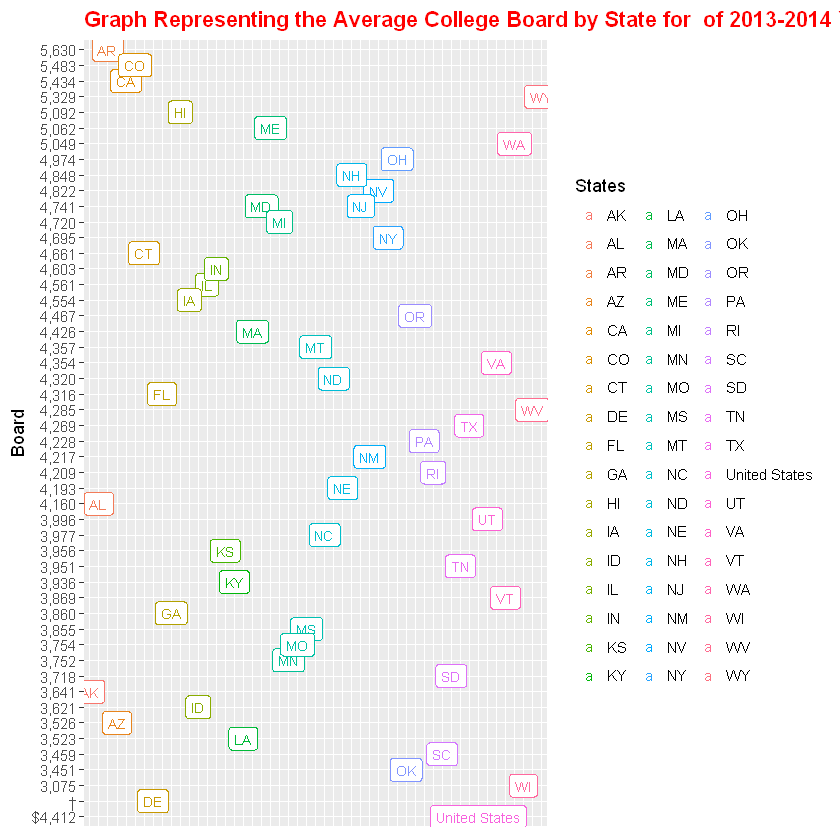

In [86]:
state_colleges %>%
    group_by(Total_OS_13) %>%
    ggplot() +
        geom_label(mapping = aes(x = States, y = Board,  color=States, label = States), size = 3.0) +
        ggtitle(label = "Graph Representing the Average College Board by State for  of 2013-2014 Year") +
        theme(plot.title = element_text(face = "bold",colour = "red"),
              axis.title.x=element_blank(),
              axis.text.x=element_blank(),
              axis.ticks.x=element_blank())

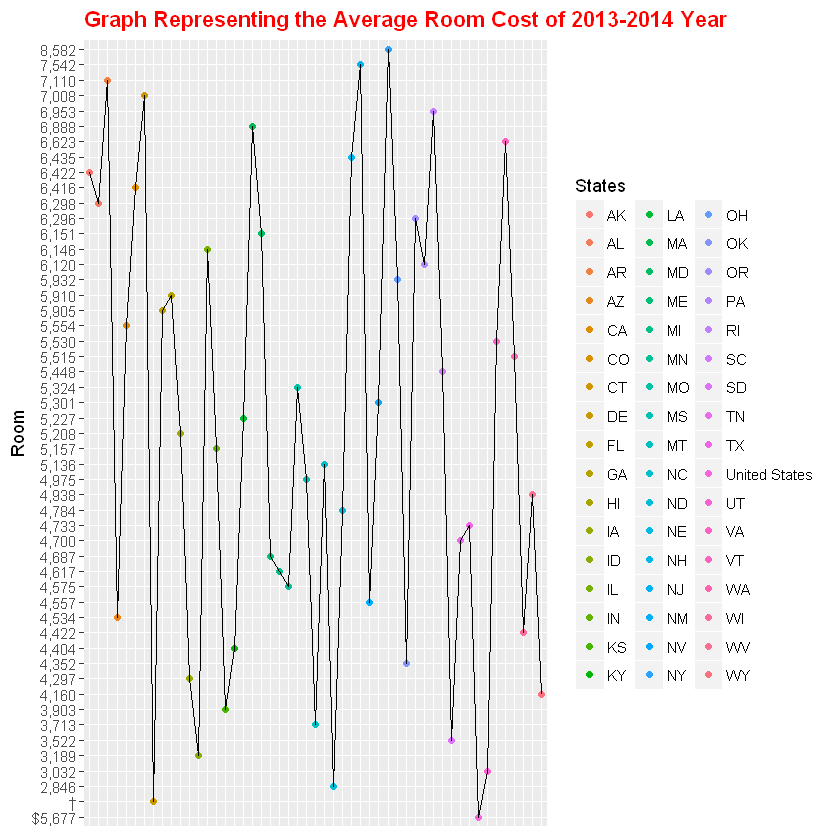

In [90]:
state_colleges %>%
    group_by(Total_OS_13) %>%
    ggplot() +
        geom_point(mapping = aes(x = States, y = Room, color = States)) +
        geom_line(aes(x = States, y = Room, group = 1))+ 
        ggtitle(label = "Graph Representing the Average Room Cost of 2013-2014 Year") +        
        theme(plot.title = element_text(face = "bold",colour = "red"),
              axis.title.x=element_blank(),
              axis.text.x=element_blank(),
             axis.ticks.x=element_blank())

In [93]:
yearly_cost <- read_csv("tabn330.10.csv")
names(yearly_cost)
head(yearly_cost)

Parsed with column specification:
cols(
  `<U+FEFF>"year and control` = col_character()
)
Warning message:
"234 parsing failures.
row col  expected     actual
  1  -- 1 columns 25 columns
  2  -- 1 columns 25 columns
  3  -- 1 columns 25 columns
  4  -- 1 columns 25 columns
  5  -- 1 columns 25 columns
... ... ......... ..........
See problems(...) for more details.
"

[1] "<U+FEFF>\"year and control"

"﻿""year and control"
"of institution"""
1984–85
1994–95
2000–01
2001–02
2002–03
